<a href="https://colab.research.google.com/github/luanmooraes/Machine-Learning/blob/main/machinelearningaulaaula1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(301, 9)


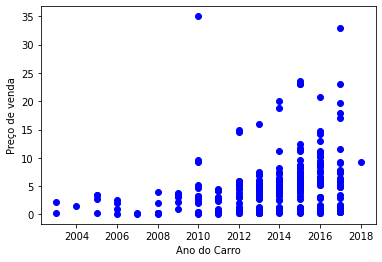

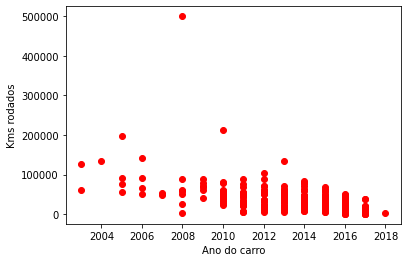

Treino
x_train:  (240, 7)
y_train:  (240, 1)
Teste
x_test:  (61, 7)
y_test:  (61, 1)
(61, 1)
(61, 1)


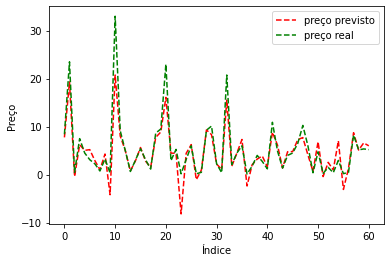

R2_score: 0.8183244025160912
R2_score: 0.867059611404617


In [ ]:
#Importando as bibliote

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/drive/My Drive/car_data.csv')

df.head()

print(df.shape)

#Trocando strings por numeros

df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace=True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace=True)
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace=True)
df.head()

#Montar a tabela

plt.scatter(df['ano'], df['preco_venda'],  color='blue')
plt.xlabel("Ano do Carro")
plt.ylabel("Preço de venda")
plt.show()

plt.scatter(df['ano'], df['kms_rodados'], color='red')
plt.xlabel("Ano do carro")
plt.ylabel("Kms rodados")
plt.show()

#Separando as variaveis em depedentes e independentes

x = df[['ano', 'preco_atual','kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos']]

y = df[['preco_venda']]

#Treinos e testes

from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = 0.2)
 

#Numero de registros que serao usados para teste e treinos

print('Treino')
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

print('Teste')
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

#Treinando o modelo

from sklearn.linear_model import LinearRegression

#define um modelo de regressao
model = LinearRegression()
#treina o modelo com os dados de treino
model.fit(x_train, y_train)

#Previsao dos precos

y_pred = model.predict(x_test)
print(y_pred.shape)
print(y_test.shape)

#Mostrando o grafico
plt.plot(range(y_pred.shape[0]), y_pred, 'r--')
plt.plot(range(y_test.shape[0]), y_test, 'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()

#Calculando a exatidao da previsao

from sklearn.metrics import r2_score

print('R2_score:', r2_score(y_test, y_pred))

#Construindo previoses com novas variaveis

new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]
new_y = df[['preco_venda']]

x_train , x_test, y_train, y_test = train_test_split(new_x, new_y, test_size = 0.2)

new_model = LinearRegression()

model.fit(x_train, y_train)

new_y_pred = model.predict(x_test)

print('R2_score:', r2_score(y_test, new_y_pred))